In [1]:
# Uninstall pre-installed kaggle 
! pip uninstall -y kaggle 

Uninstalling kaggle-1.5.10:
  Successfully uninstalled kaggle-1.5.10


In [2]:
# Install kaggle again
! pip install --upgrade -q kaggle

     |████████████████████████████████| 61kB 4.8MB/s 


In [3]:
# Check kaggle is installed 
! pip freeze | grep kaggle  # This command will work on Linux only
# If you want Windows version please use 
# !pip freeze | findstr kaggle

kaggle==1.5.10


In [4]:
# Place the kaggle.json in /root/.kaggle
! mkdir -p /root/.kaggle
! mv kaggle.json /root/.kaggle

In [5]:
import kaggle

In [6]:
! kaggle competitions download -c dog-breed-identification

100% 689M/691M [00:18<00:00, 33.1MB/s]
100% 691M/691M [00:18<00:00, 38.4MB/s]


In [7]:
! unzip -q dog-breed-identification.zip

In [8]:
# 1. Train -> contains all training data images 
# 2. labels.csv -> This is a mapping file with file name and dog breed category

In [9]:
! head labels.csv

id,breed
000bec180eb18c7604dcecc8fe0dba07,boston_bull
001513dfcb2ffafc82cccf4d8bbaba97,dingo
001cdf01b096e06d78e9e5112d419397,pekinese
00214f311d5d2247d5dfe4fe24b2303d,bluetick
0021f9ceb3235effd7fcde7f7538ed62,golden_retriever
002211c81b498ef88e1b40b9abf84e1d,bedlington_terrier
00290d3e1fdd27226ba27a8ce248ce85,bedlington_terrier
002a283a315af96eaea0e28e7163b21b,borzoi
003df8b8a8b05244b1d920bb6cf451f9,basenji


In [10]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [11]:
label = pd.read_csv("labels.csv")

In [12]:
type(label)

pandas.core.frame.DataFrame

In [13]:
label.head()

id             breed
0  000bec180eb18c7604dcecc8fe0dba07       boston_bull
1  001513dfcb2ffafc82cccf4d8bbaba97             dingo
2  001cdf01b096e06d78e9e5112d419397          pekinese
3  00214f311d5d2247d5dfe4fe24b2303d          bluetick
4  0021f9ceb3235effd7fcde7f7538ed62  golden_retriever

In [14]:
label["filename"] = label["id"] + ".jpg"

In [15]:
label.head()

id  ...                              filename
0  000bec180eb18c7604dcecc8fe0dba07  ...  000bec180eb18c7604dcecc8fe0dba07.jpg
1  001513dfcb2ffafc82cccf4d8bbaba97  ...  001513dfcb2ffafc82cccf4d8bbaba97.jpg
2  001cdf01b096e06d78e9e5112d419397  ...  001cdf01b096e06d78e9e5112d419397.jpg
3  00214f311d5d2247d5dfe4fe24b2303d  ...  00214f311d5d2247d5dfe4fe24b2303d.jpg
4  0021f9ceb3235effd7fcde7f7538ed62  ...  0021f9ceb3235effd7fcde7f7538ed62.jpg

[5 rows x 3 columns]

In [16]:
idg = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1/255, validation_split=0.2)

In [17]:
train_idg = idg.flow_from_dataframe(label, "train", x_col="filename", y_col="breed", 
                                    target_size=(200, 200), batch_size=32, subset="training")
val_idg = idg.flow_from_dataframe(label, "train", x_col="filename", y_col="breed", 
                                  target_size=(200, 200), batch_size=32, subset="validation")

Found 8178 validated image filenames belonging to 120 classes.
Found 2044 validated image filenames belonging to 120 classes.


In [18]:
8174 + 2044 

10218

In [19]:
# 10218 images for 120 categories (Dog Breed Dataset)
# 25000 images for   2 categories (Cat Dog Dataset)

# Any RED ALERTS ?? ANY THING TO WORRY! 

In [20]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=(200, 200, 3)))
model.add(tf.keras.layers.Dense(512, activation=tf.keras.activations.relu))
model.add(tf.keras.layers.Dense(256, activation=tf.keras.activations.relu))
model.add(tf.keras.layers.Dense(120, activation=tf.keras.activations.softmax))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 120000)            0         
_________________________________________________________________
dense (Dense)                (None, 512)               61440512  
_________________________________________________________________
dense_1 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_2 (Dense)              (None, 120)               30840     
Total params: 61,602,680
Trainable params: 61,602,680
Non-trainable params: 0
_________________________________________________________________


In [21]:
model.compile(optimizer=tf.keras.optimizers.SGD(), loss=tf.keras.losses.categorical_crossentropy, metrics=["acc"])

In [ ]:
model.fit_generator(train_idg, epochs=10, validation_data=val_idg)

In [ ]:
# We want more input data and if client is not giving us.. What do we do ? 

### Image Augumentation

In [24]:
from PIL import Image 
import cv2
test_image = "./train/000bec180eb18c7604dcecc8fe0dba07.jpg"

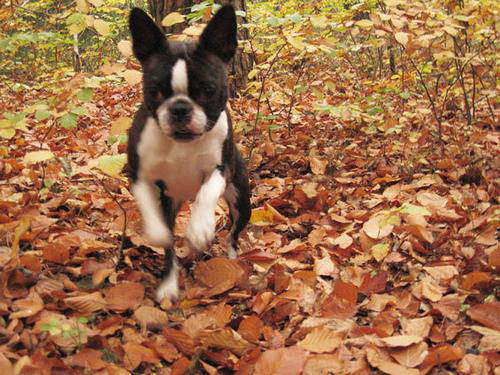

In [26]:
Image.open(test_image)

In [52]:
test_idg = tf.keras.preprocessing.image.ImageDataGenerator(rotation_range=40, width_shift_range=0.2, height_shift_range=0.2,
                                                           zoom_range=0.2, horizontal_flip=True, rescale=1/255)

In [53]:
testimage = tf.keras.preprocessing.image.load_img("./train/000bec180eb18c7604dcecc8fe0dba07.jpg")

In [54]:
testimage = tf.keras.preprocessing.image.img_to_array(testimage)

In [55]:
testimage.shape

(375, 500, 3)

In [56]:
testimage = np.expand_dims(testimage, axis=0)
testimage.shape

(1, 375, 500, 3)

In [57]:
! mkdir -p temp

<class 'tensorflow.python.keras.preprocessing.image.NumpyArrayIterator'>
(375, 500, 3)


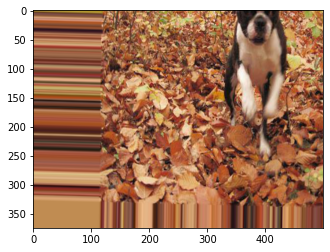

In [65]:
# rotation_range=40, width_shift_range=0.2, height_shift_range=0.2,
# zoom_range=0.2, horizontal_flip=True
image_batch = test_idg.flow(testimage, batch_size=1, save_to_dir="temp", save_prefix="formatted_")
# Image Data Generator never returns a image it returns a Iterator
print(type(image_batch))
test_image = image_batch[0][0]
print(test_image.shape)
plt.imshow(test_image)

In [66]:
# Our dataset is still going to be 10218 images only 
# but everytime a new image will appear


# 1st Epoch - Original image 
# 2nd Epoch - Augumentaed image 
# 3rd Epoch - Augumentaed image

In [67]:
new_idg = tf.keras.preprocessing.image.ImageDataGenerator(width_shift_range=0.2, height_shift_range=0.2, 
                                                          rotation_range=30, 
                                                          brightness_range=(0.2, 0.4), 
                                                          horizontal_flip=True, rescale=1/255, validation_split=0.2)

In [68]:
train_idg = new_idg.flow_from_dataframe(label, "train", x_col="filename", y_col="breed", target_size=(200, 200), batch_size=64, subset="training")
val_idg = new_idg.flow_from_dataframe(label, "train", x_col="filename", y_col="breed", target_size=(200, 200), batch_size=64, subset="validation")

Found 8178 validated image filenames belonging to 120 classes.
Found 2044 validated image filenames belonging to 120 classes.


In [69]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=(200, 200, 3)))
model.add(tf.keras.layers.Dense(512, activation=tf.keras.activations.relu))
model.add(tf.keras.layers.Dense(256, activation=tf.keras.activations.relu))
model.add(tf.keras.layers.Dense(120, activation=tf.keras.activations.softmax))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 120000)            0         
_________________________________________________________________
dense_3 (Dense)              (None, 512)               61440512  
_________________________________________________________________
dense_4 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_5 (Dense)              (None, 120)               30840     
Total params: 61,602,680
Trainable params: 61,602,680
Non-trainable params: 0
_________________________________________________________________


In [71]:
model.compile(optimizer=tf.keras.optimizers.SGD(), loss=tf.keras.losses.categorical_crossentropy, metrics=["acc"])

In [ ]:
model.fit(train_idg, epochs=10, validation_data=val_idg)

In [74]:
label.breed.value_counts()

scottish_deerhound      126
maltese_dog             117
afghan_hound            116
entlebucher             115
bernese_mountain_dog    114
                       ... 
komondor                 67
brabancon_griffon        67
golden_retriever         67
eskimo_dog               66
briard                   66
Name: breed, Length: 120, dtype: int64

(array([-20.,   0.,  20.,  40.,  60.,  80., 100., 120., 140.]),
 <a list of 9 Text major ticklabel objects>)

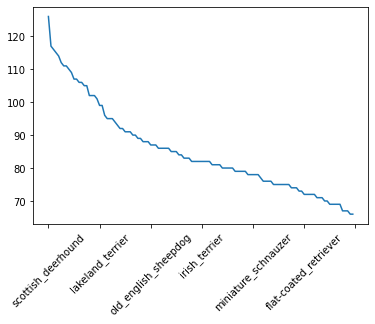

In [77]:
label.breed.value_counts().plot()
plt.xticks(rotation=45)

In [78]:
# Problems with Dog Breed dataset 
# 1. Images are less -> Image Data Augumentation
# 2. Class Imbalance Problem
# 3. 
# 4. Overfiting -> 
# 5. 